In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 1 atm in Pa
ps0 = 1.01325e5
ps0

101325.0

In [21]:
def absorption(f, t=20, rh=60, ps=ps0):
    """ In dB/m
    
        f: frequency in Hz
        t: temperature in °C
        rh: relative humidity in %
        ps: atmospheric pressure in Pa

        From http://en.wikibooks.org/wiki/Engineering_Acoustics/Outdoor_Sound_Propagation
        See __main__ for actual curves.
    """
    
    f = f.reshape(1, len(f))
    if type(t) != int:
        t = t.reshape(len(t), 1)
    if type(rh) != int:
        rh = rh.reshape(len(rh), 1)
    T = t + 273.15
    T0 = 293.15
    T01 = 273.16

    Csat = -6.8346 * np.power(T01 / T, 1.261) + 4.6151
    rhosat = np.power(10, Csat)
    H = rhosat * rh * ps0 / ps

    frn = (ps / ps0) * np.power(T0 / T, 0.5) * (
            9 + 280 * H * np.exp(-4.17 * (np.power(T0 / T, 1/3.) - 1)))

    fro = (ps / ps0) * (24.0 + 4.04e4 * H * (0.02 + H) / (0.391 + H))

    alpha = f * f * (
        1.84e-11 / ( np.power(T0 / T, 0.5) * ps / ps0 )
        + np.power(T / T0, -2.5)
        * (
            0.10680 * np.exp(-3352 / T) * frn / (f * f + frn * frn)
            + 0.01278 * np.exp(-2239.1 / T) * fro / (f * f + fro * fro)
            )
        )

    return 20 * alpha / np.log(10)

def plot():
    ## Figure in http://en.wikibooks.org/wiki/Engineering_Acoustics/Outdoor_Sound_Propagation
    ax = plt.subplot(111)
    fs = np.linspace(int(1e3), int(1e5), int(1e3), endpoint=True)
    ys = absorption(fs)
    ax.plot(fs, ys, label='rh:%d'%60)
    ax.grid(True)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Absorption coefficient/pressure [dB/m]')
    ax.legend(loc='lower right')
    plt.show()

def table():
    p = ps0
    for t in [20, 15, 10]:
        for rh in [20, 50, 60, 90]:
            print("T=%2d RH=%2d " % (t, rh), end='')
            f = np.arange(12e3, 72e3, 1e3)
            a = absorption(f, t, rh, p)
            print(a)
            print()

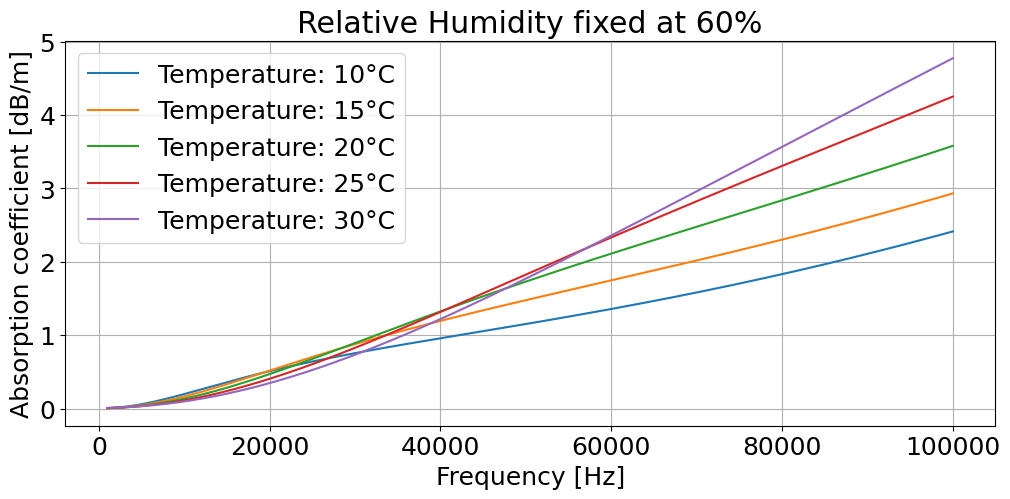

In [28]:
plt.figure(figsize=(12, 5))
plt.rcParams.update({'font.size':18})
fs = np.linspace(int(1e3), int(1e5), int(1e3), endpoint=True)
t = np.arange(10, 35, 5)
t_labels = []
for temp in t:
    t_labels.append(f'Temperature: {temp}°C')
ys = absorption(fs, t=t)
fs = fs * np.ones((len(t), 1))
plt.title('Relative Humidity fixed at 60%')
plt.plot(fs.T, ys.T, label=t_labels)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Absorption coefficient [dB/m]')
plt.legend()
plt.show()

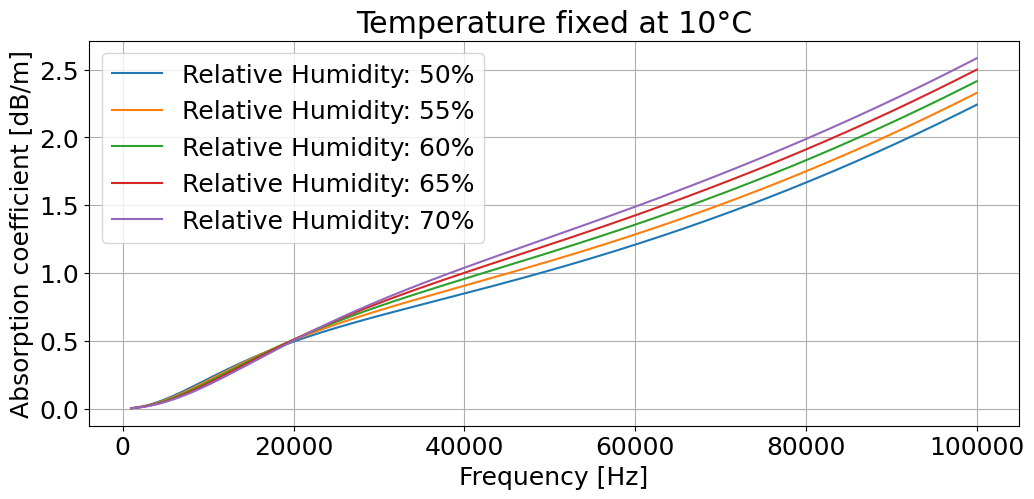

In [37]:
plt.figure(figsize=(12, 5))
plt.rcParams.update({'font.size':18})
fs = np.linspace(int(1e3), int(1e5), int(1e3), endpoint=True)
rh = np.arange(50, 75, 5)
rh_labels = []
for rel_h in rh:
    rh_labels.append(f'Relative Humidity: {rel_h}%')
ys = absorption(fs, t=10, rh=rh)
fs = fs * np.ones((len(rh), 1))
plt.title('Temperature fixed at 10°C')
plt.plot(fs.T, ys.T, label=rh_labels)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Absorption coefficient [dB/m]')
plt.legend()
plt.show()

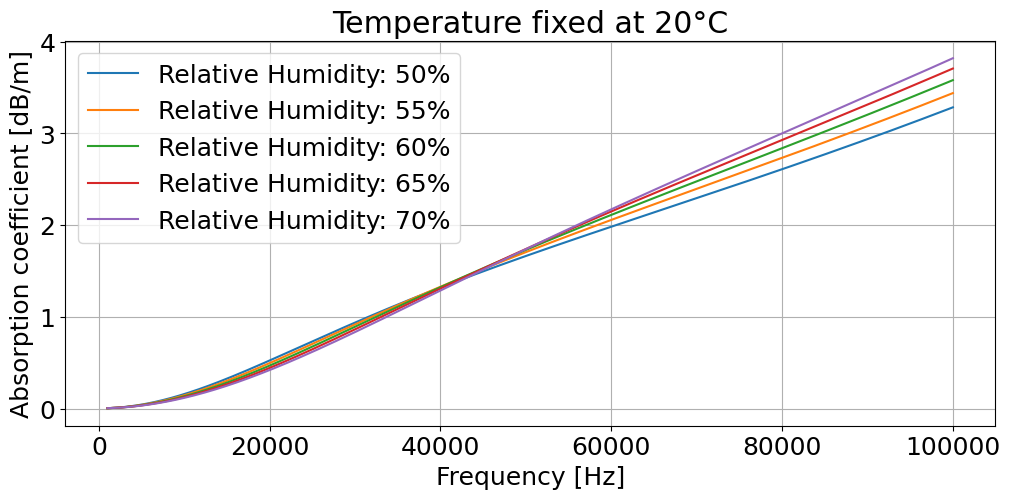

In [32]:
plt.figure(figsize=(12, 5))
plt.rcParams.update({'font.size':18})
fs = np.linspace(int(1e3), int(1e5), int(1e3), endpoint=True)
rh = np.arange(50, 75, 5)
rh_labels = []
for rel_h in rh:
    rh_labels.append(f'Relative Humidity: {rel_h}%')
ys = absorption(fs, t=20, rh=rh)
fs = fs * np.ones((len(rh), 1))
plt.title('Temperature fixed at 20°C')
plt.plot(fs.T, ys.T, label=rh_labels)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Absorption coefficient [dB/m]')
plt.legend()
plt.show()

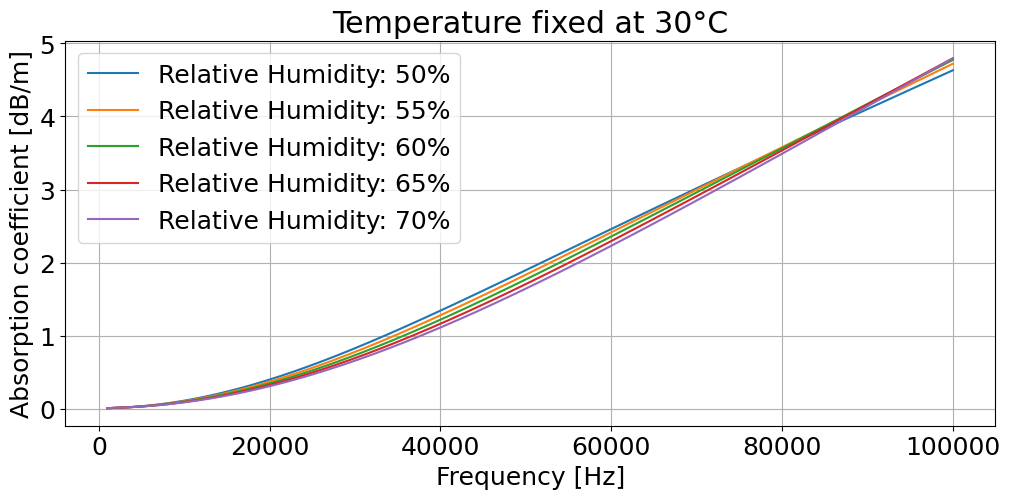

In [36]:
plt.figure(figsize=(12, 5))
plt.rcParams.update({'font.size':18})
fs = np.linspace(int(1e3), int(1e5), int(1e3), endpoint=True)
rh = np.arange(50, 75, 5)
rh_labels = []
for rel_h in rh:
    rh_labels.append(f'Relative Humidity: {rel_h}%')
ys = absorption(fs, t=30, rh=rh)
fs = fs * np.ones((len(rh), 1))
plt.title('Temperature fixed at 30°C')
plt.plot(fs.T, ys.T, label=rh_labels)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Absorption coefficient [dB/m]')
plt.legend()
plt.show()